/tmp/ipykernel_4061/684694102.py:64: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  vel_arr.append(float(velocity[0]))


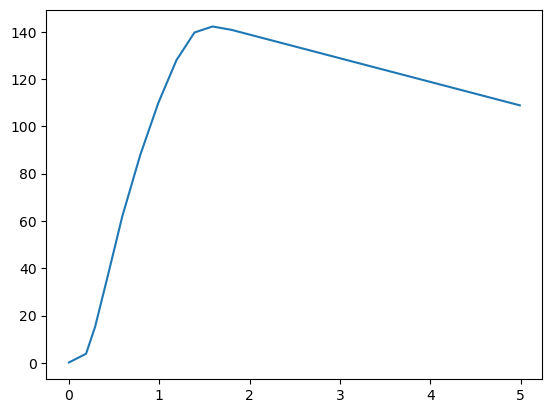

In [40]:
import numpy as np
from sympy import *
import matplotlib.pyplot as plt

def W_from_L(results):
    # results - vector 1x3
    J = np.matrix('7 2 3; 5 -3 2; 10 -11 5')
    J_det = np.linalg.det(J)
    #create matrixes for angle velocities
    w_x_m = np.matrix(J)
    w_y_m = np.matrix(J)
    w_z_m = np.matrix(J)
    w_x_m[:, 0] = results
    w_y_m[:, 1] = results
    w_z_m[:, 2] = results
    w_x = np.linalg.det(w_x_m) / J_det
    w_y = np.linalg.det(w_y_m) / J_det
    w_z = np.linalg.det(w_z_m) / J_det

    print(np.dot(J, np.matrix(str(w_x)+'; '+str(w_y)+'; '+str(w_z))))
    return np.array([w_x, w_y, w_z])


def Engine_Acceleration(time):
    force = np.matrix('0.0; 0.0; 0.0');
    if time > 2:
        pass
    elif time < 0.2:
        force[0] = 44
    elif time < 0.3:
        force[0] = 186
    elif time < 0.4:
        force[0] = 243
    elif time < 0.6:
        force[0] = 250
    elif time < 0.8:
        force[0] = 211
    elif time < 1.0:
        force[0] = 180
    elif time < 1.2:
        force[0] = 150
    elif time < 1.4:
        force[0] = 103
    elif time < 1.6:
        force[0] = 34
    elif time < 1.8:
        force[0] = 5
    force /= 1.5 #mass of the rocket, should be time function
    return force


time_arr = []
vel_arr = []
velocity = np.matrix('0.0; 0.0; 0.0')
delta_t = 0.01
for i in range(int(5/delta_t)):
    time = i * delta_t
    acc = np.matrix('0.0; 0.0; 0.0');
    acc += Engine_Acceleration(time)
    acc += np.matrix('-10; 0; 0')
    velocity += acc * delta_t
    #print(velocity[0], velocity[1], velocity[2])
    time_arr.append(time)
    vel_arr.append(float(velocity[0]))
    #vel_arr.append(float(acc[0]))

x = [1.0, 2.0, 3.0, 4.0, 5.0]
y = [25.0, 32.0, 34.0, 20.0, 25.0]
plt.plot(time_arr, vel_arr)
plt.show()
    

#print(W_from_L(np.matrix('1; 43; 1')))
#print(Engine_Acceleration(1))